In [1]:
import pandas as pd
import numpy as np 
import nibabel as nib
import nilearn

In [2]:
from nilearn import plotting, image
from nilearn.glm.first_level import compute_regressor
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm.first_level import FirstLevelModel

In [3]:
init_folder='/home/traaffneu/margal/code/multirat_se'
analysis_folder='/project/4180000.19/multirat_stim'

In [50]:
#Data path
subject_path = '/project/4180000.19/multirat_stim/rabies_test/preprocess/bold_datasink/commonspace_bold/_scan_info_subject_id0200200.session1_split_name_sub-0200200_ses-1_T2w/_run_1/sub-0200200_ses-1_run-1_bold_combined.nii.gz'
template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'
rat_subj = 200200

In [5]:
metadata = pd.read_csv('/project/4180000.19/multirat_stim/MultiRat_SE_metadata - multiRat_stim.tsv', sep='\t', header=0, index_col=3)

In [33]:
onset = np.matrix(metadata.loc[rat_subj,'func.sensory.onset']).A[0]
duration = np.matrix(metadata.loc[rat_subj,'func.sensory.duration']).A[0]

In [34]:
events = pd.DataFrame({'onset': onset,
                       'duration': duration})

In [35]:
print(events)

   onset  duration
0     30         6
1    120         6
2    210         6
3    200         6
4    390         6
5    480         6


In [44]:
hrf_model = 'glover'
tr = 1.5
n_scans = 325 #nb volumes
frame_times = np.arange(n_scans) * tr 

design = make_first_level_design_matrix(
    frame_times, events, drift_model='polynomial', drift_order=3, hrf_model=hrf_model)

<AxesSubplot:label='conditions', ylabel='scan number'>

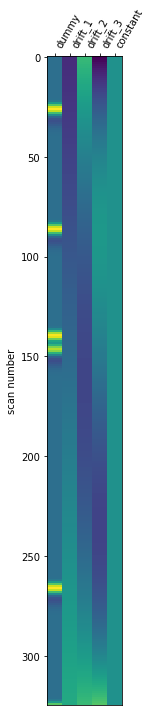

In [45]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design)

In [39]:
func_img = nib.load(subject_path)
header = func_img.header

In [47]:
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(subject_path, design_matrices=design)

In [48]:
n_columns = design.shape[1]
contrast_val = np.hstack(([1], np.zeros(n_columns - 1)))

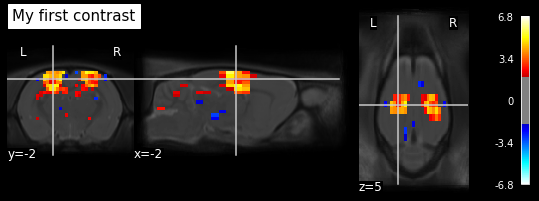

In [51]:
summary_statistics_session1 = fmri_glm.compute_contrast(
    contrast_val, output_type='all')

plotting.plot_stat_map(
    summary_statistics_session1['z_score'],
    bg_img = template_path, threshold = 1.9,
    title = 'My first contrast')